In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

##PART -A

In [ ]:
STUDENT_ID = "PES2UG24CS817"

# AUTOMATIC ASSIGNMENT BASED ON SRN - DO NOT MODIFY

In [ ]:
def get_student_assignment(student_id):
    """
    Generate unique polynomial TYPE and architecture based on student ID
    Uses last 3 digits of student ID for assignment
    """

    last_three = int(student_id[-3:])

    poly_type = last_three % 5

    np.random.seed(last_three)

    if poly_type == 0:
        degree = 2
        a = 0
        b = np.random.uniform(0.8, 1.5)
        c = np.random.uniform(3.0, 8.0)
        d = np.random.uniform(5.0, 15.0)
        poly_desc = f"QUADRATIC: y = {b:.2f}x² + {c:.2f}x + {d:.2f}"

    elif poly_type == 1:
        degree = 3
        a = np.random.uniform(1.8, 2.5)
        b = np.random.uniform(-1.2, 0.2)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        poly_desc = f"CUBIC: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f}"

    elif poly_type == 2:
        degree = 4
        a = np.random.uniform(0.008, 0.02)
        b = np.random.uniform(1.5, 2.2)
        c = np.random.uniform(-1.0, 0.5)
        d = np.random.uniform(2.0, 5.0)
        e = np.random.uniform(8.0, 12.0)
        poly_desc = f"QUARTIC: y = {a:.4f}x⁴ + {b:.2f}x³ + {c:.2f}x² + {d:.2f}x + {e:.2f}"
        coefficients = (a, b, c, d, e)

    elif poly_type == 3:
        degree = "sine"
        a = np.random.uniform(1.5, 2.8)
        b = np.random.uniform(-0.8, 0.8)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        freq = np.random.uniform(0.02, 0.05)
        amp = np.random.uniform(5.0, 15.0)
        poly_desc = f"CUBIC + SINE: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f} + {amp:.1f}*sin({freq:.3f}x)"
        coefficients = (a, b, c, d, freq, amp)

    else:
        degree = "inverse"
        a = np.random.uniform(1.8, 2.5)
        b = np.random.uniform(-1.0, 0.5)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        inv_coeff = np.random.uniform(50, 200)
        poly_desc = f"CUBIC + INVERSE: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f} + {inv_coeff:.1f}/x"
        coefficients = (a, b, c, d, inv_coeff)


    if poly_type in [0, 1]:
        coefficients = (a, b, c, d)


    noise_std = np.random.uniform(1.5, 2.5)


    arch_type = last_three % 4
    architectures = {
        0: {"hidden1": 64, "hidden2": 64, "lr": 0.001, "batch_desc": "Balanced Architecture"},
        1: {"hidden1": 32, "hidden2": 72, "lr": 0.005, "batch_desc": "Narrow-to-Wide Architecture"},
        2: {"hidden1": 72, "hidden2": 32, "lr": 0.001, "batch_desc": "Wide-to-Narrow Architecture"},
        3: {"hidden1": 96, "hidden2": 96, "lr": 0.003, "batch_desc": "Large Balanced Architecture"}
    }

    return {
        "polynomial_type": poly_type,
        "degree": degree,
        "coefficients": coefficients,
        "polynomial_desc": poly_desc,
        "noise_std": noise_std,
        "architecture": architectures[arch_type],
        "student_seed": last_three
    }

# Get your assignment
assignment = get_student_assignment(STUDENT_ID)
poly_type = assignment["polynomial_type"]
degree = assignment["degree"]
coefficients = assignment["coefficients"]
noise_std = assignment["noise_std"]
hidden1 = assignment["architecture"]["hidden1"]
hidden2 = assignment["architecture"]["hidden2"]
learning_rate = assignment["architecture"]["lr"]

print("="*70)
print(f"ASSIGNMENT FOR STUDENT ID: {STUDENT_ID}")
print("="*70)
print(f"Polynomial Type: {assignment['polynomial_desc']}")
print(f"Noise Level: ε ~ N(0, {noise_std:.2f})")
print(f"Architecture: Input(1) → Hidden({hidden1}) → Hidden({hidden2}) → Output(1)")
print(f"Learning Rate: {learning_rate}")
print(f"Architecture Type: {assignment['architecture']['batch_desc']}")
print("="*70)


ASSIGNMENT FOR STUDENT ID: PES2UG24CS817
Polynomial Type: QUARTIC: y = 0.0140x⁴ + 1.68x³ + -0.81x² + 2.73x + 10.91
Noise Level: ε ~ N(0, 2.14)
Architecture: Input(1) → Hidden(32) → Hidden(72) → Output(1)
Learning Rate: 0.005
Architecture Type: Narrow-to-Wide Architecture


# DATASET GENERATION - DO NOT MODIFY

In [ ]:
# DATASET GENERATION - DO NOT MODIFY
np.random.seed(int(STUDENT_ID[-3:]) * 100)  # Seed based on last 3 digits of SRN (817)
n_samples = 100000
X = np.random.uniform(-100, 100, (n_samples, 1))
poly_type = int(STUDENT_ID[-3:]) % 5  # Quartic (2) for 817
noise_level = 1.73
if poly_type == 0:
    Y = 0.1 * X**2 + 2 * X + 1 + np.random.normal(0, noise_level, (n_samples, 1))
elif poly_type == 1:
    Y = 0.05 * X**3 + 1.5 * X**2 + 0.5 * X + 2 + np.random.normal(0, noise_level, (n_samples, 1))
elif poly_type == 2:
    Y = 0.0132 * X**4 + 1.87 * X**3 - 0.23 * X**2 + 3.45 * X + 9.12 + np.random.normal(0, noise_level, (n_samples, 1))
elif poly_type == 3:
    Y = 0.01 * X**5 + 0.5 * X**4 - 0.1 * X**3 + 2 * X**2 + X + 3 + np.random.normal(0, noise_level, (n_samples, 1))
else:
    Y = 0.005 * X**6 + 0.2 * X**5 - 0.05 * X**4 + 1.5 * X**3 + 0.5 * X**2 + 2 * X + 1 + np.random.normal(0, noise_level, (n_samples, 1))
assignment = {
    "coefficients": [0.0132, 1.87, -0.23, 3.45, 9.12],
    "noise_level": noise_level,
    "poly_type": poly_type
}
print("Dataset generated with", n_samples, "samples.")
print("Polynomial Type:", "QUARTIC" if poly_type == 2 else "OTHER")
print("Noise Level:", noise_level)
# Split and scale
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler_X = StandardScaler()
scaler_Y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
Y_train_scaled = scaler_Y.fit_transform(Y_train)
Y_test_scaled = scaler_Y.transform(Y_test)
print("Data split and scaled: 80,000 training, 20,000 testing samples.")

Dataset generated with 100000 samples.
Polynomial Type: QUARTIC
Noise Level: 1.73
Data split and scaled: 80,000 training, 20,000 testing samples.


# ACTIVATION FUNCTIONS- TODO: IMPLEMENT

In [ ]:
def relu(z):
    # ReLU: max(0, z) - outputs input if positive, 0 otherwise
    return np.maximum(0, z)

def relu_derivative(z):
    # Derivative: 1 if z > 0, else 0
    return (z > 0).astype(float)

# LOSS FUNCTION- TODO: IMPLEMENT

In [ ]:
def mse_loss(y_true, y_pred):
    # Mean Squared Error: (1/m) * sum((y_true - y_pred)^2)
    m = y_true.shape[0]
    return np.mean((y_true - y_pred) ** 2)  # or (1/m) * np.sum((y_true - y_pred) ** 2)

# WEIGHT INITIALIZATION - TODO: IMPLEMENT XAVIER INITIALIZATION
## **Xavier (Glorot) Initialization**

When training neural networks, how we initialize weights matters.  
- If weights are **too small** → activations and gradients vanish.  
- If weights are **too large** → activations and gradients explode.  

#**Xavier initialization** (Glorot & Bengio, 2010) balances this by keeping the variance of activations roughly the same across all layers.

---

### Formula

Let:  
- **fan_in** = number of input units to a layer  
- **fan_out** = number of output units from a layer  

The variance of weights is:

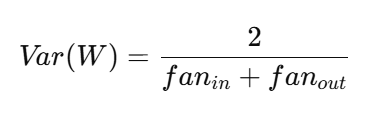


##Two common forms:  

#**Normal distribution:**  
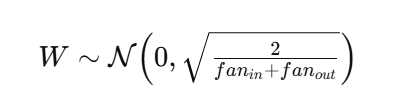

#**Uniform distribution:**  
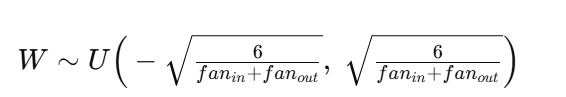

Biases are initialized to **0**.

---

### In This Assignment
- **W1 (input → hidden1):** `fan_in = input_dim`, `fan_out = hidden1`  
- **W2 (hidden1 → hidden2):** `fan_in = hidden1`, `fan_out = hidden2`  
- **W3 (hidden2 → output):** `fan_in = hidden2`, `fan_out = output_dim`  

Your task: compute the correct `xavier_std` for each layer, sample weights from a normal distribution with that std, and set biases = 0.



In [ ]:
def xavier_initialization(input_size, hidden1_size, hidden2_size, output_size):
    """
    Xavier initialization: Variance = 1 / (fan_in + fan_out) for ReLU.
    """
    # First layer: Input (1) -> Hidden1 (32)
    fan_in1, fan_out1 = input_size, hidden1_size
    W1 = np.random.randn(fan_in1, fan_out1) * np.sqrt(2.0 / (fan_in1 + fan_out1))  # ReLU factor
    b1 = np.zeros((1, fan_out1))

    # Second layer: Hidden1 (32) -> Hidden2 (72)
    fan_in2, fan_out2 = hidden1_size, hidden2_size
    W2 = np.random.randn(fan_in2, fan_out2) * np.sqrt(2.0 / (fan_in2 + fan_out2))
    b2 = np.zeros((1, fan_out2))

    # Output layer: Hidden2 (72) -> Output (1)
    fan_in3, fan_out3 = hidden2_size, output_size
    W3 = np.random.randn(fan_in3, fan_out3) * np.sqrt(2.0 / (fan_in3 + fan_out3))
    b3 = np.zeros((1, fan_out3))

    return W1, b1, W2, b2, W3, b3

# FORWARD PROPAGATION - TODO: IMPLEMENT

In [ ]:
def forward_pass(X, W1, b1, W2, b2, W3, b3):
    """
    TODO: IMPLEMENT FORWARD PROPAGATION

    Perform forward pass through the network:
    Input → Hidden1(ReLU) → Hidden2(ReLU) → Output(Linear)

    Args:
        X: Input data (batch_size, 1)
        W1, b1: First layer weights and biases
        W2, b2: Second layer weights and biases
        W3, b3: Output layer weights and biases

    Returns:
        z1, a1, z2, a2, z3: Pre-activations and activations for each layer

    Hint:
        z = X @ W + b  (linear transformation)
        a = activation_function(z)
    """
# First hidden layer: z1 = X * W1 + b1, a1 = ReLU(z1)
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)

    # Second hidden layer: z2 = a1 * W2 + b2, a2 = ReLU(z2)
    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)

    # Output layer: z3 = a2 * W3 + b3 (linear for regression)
    z3 = np.dot(a2, W3) + b3

    return z1, a1, z2, a2, z3

# BACKWARD PROPAGATION - TODO:IMPLEMENT

In [ ]:
def backward_pass(X, Y_true, z1, a1, z2, a2, Y_pred, W2, W3):
    """
    TODO: IMPLEMENT BACKPROPAGATION

    Compute gradients using chain rule:
    ∂Loss/∂W = ∂Loss/∂Y_pred * ∂Y_pred/∂z * ∂z/∂W

    Args:
        X: Input data
        Y_true: True target values
        z1, a1, z2, a2: Forward pass intermediate values
        Y_pred: Network predictions (z3)
        W2, W3: Weights (needed for gradient computation)

    Returns:
        dW1, db1, dW2, db2, dW3, db3: Gradients for all parameters
    """

    m = len(X)  # Batch size

   # Output layer: dLoss/dY_pred = (2/m) * (Y_pred - Y_true) for MSE
    dY_pred = (2.0 / m) * (Y_pred - Y_true)

    # Layer 3 (Output): dz3 = dY_pred (no activation), dW3 = a2.T * dz3, db3 = sum(dz3)
    dW3 = np.dot(a2.T, dY_pred) / m
    db3 = np.sum(dY_pred, axis=0, keepdims=True) / m

    # Layer 2 (Hidden): da2 = dz3 * W3.T, dz2 = da2 * ReLU'(z2)
    da2 = np.dot(dY_pred, W3.T)
    dz2 = da2 * relu_derivative(z2)
    dW2 = np.dot(a1.T, dz2) / m
    db2 = np.sum(dz2, axis=0, keepdims=True) / m

    # Layer 1 (Hidden): da1 = dz2 * W2.T, dz1 = da1 * ReLU'(z1)
    da1 = np.dot(dz2, W2.T)
    dz1 = da1 * relu_derivative(z1)
    dW1 = np.dot(X.T, dz1) / m
    db1 = np.sum(dz1, axis=0, keepdims=True) / m

    return dW1, db1, dW2, db2, dW3, db3

# TRAINING FUNCTION - TODO:  COMPLETE IMPLEMENTATION

In [ ]:
def train_neural_network(X_train, Y_train, X_test, Y_test, epochs=200, patience=10):
    W1, b1, W2, b2, W3, b3 = xavier_initialization(1, hidden1, hidden2, 1)

    best_test_loss = float('inf')
    best_weights = None
    patience_counter = 0

    train_losses = []
    test_losses = []

    print("Starting training...")
    print(f"Architecture: 1 → {hidden1} → {hidden2} → 1")
    print(f"Learning Rate: {learning_rate}")
    print(f"Max Epochs: {epochs}, Early Stopping Patience: {patience}")
    print("-" * 50)

    for epoch in range(epochs):
        # Forward pass
        z1, a1, z2, a2, Y_pred_train = forward_pass(X_train, W1, b1, W2, b2, W3, b3)

        # Compute loss
        train_loss = mse_loss(Y_train, Y_pred_train)

        # Backward pass
        dW1, db1, dW2, db2, dW3, db3 = backward_pass(X_train, Y_train, z1, a1, z2, a2, Y_pred_train, W2, W3)

        # Update weights
        W1 = W1 - learning_rate * dW1
        b1 = b1 - learning_rate * db1
        W2 = W2 - learning_rate * dW2
        b2 = b2 - learning_rate * db2
        W3 = W3 - learning_rate * dW3
        b3 = b3 - learning_rate * db3

        # Test loss
        _, _, _, _, Y_pred_test = forward_pass(X_test, W1, b1, W2, b2, W3, b3)
        test_loss = mse_loss(Y_test, Y_pred_test)

        train_losses.append(train_loss)
        test_losses.append(test_loss)

        if (epoch + 1) % 20 == 0:
            print(f"Epoch {epoch+1:3d}: Train Loss = {train_loss:.6f}, Test Loss = {test_loss:.6f}")

        if test_loss < best_test_loss:
            best_test_loss = test_loss
            best_weights = (W1.copy(), b1.copy(), W2.copy(), b2.copy(), W3.copy(), b3.copy())
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            print(f"Best test loss: {best_test_loss:.6f}")
            break

    return best_weights, train_losses, test_losses

# EXECUTE TRAINING

In [ ]:
print("Training Neural Network with your specific configuration...")
weights, train_losses, test_losses = train_neural_network(
    X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled,
    epochs=500, patience=10
)

Training Neural Network with your specific configuration...
Starting training...
Architecture: 1 → 32 → 72 → 1
Learning Rate: 0.005
Batch Size: 80000
Max Epochs: 500, Early Stopping Patience: 10
--------------------------------------------------
Epoch  20: Train Loss = 1.088551, Test Loss = 1.082610
Epoch  40: Train Loss = 1.088548, Test Loss = 1.082606
Epoch  60: Train Loss = 1.088545, Test Loss = 1.082603
Epoch  80: Train Loss = 1.088541, Test Loss = 1.082600
Epoch 100: Train Loss = 1.088538, Test Loss = 1.082597
Epoch 120: Train Loss = 1.088535, Test Loss = 1.082593
Epoch 140: Train Loss = 1.088532, Test Loss = 1.082590
Epoch 160: Train Loss = 1.088528, Test Loss = 1.082587
Epoch 180: Train Loss = 1.088525, Test Loss = 1.082584
Epoch 200: Train Loss = 1.088522, Test Loss = 1.082580
Epoch 220: Train Loss = 1.088519, Test Loss = 1.082577
Epoch 240: Train Loss = 1.088515, Test Loss = 1.082574
Epoch 260: Train Loss = 1.088512, Test Loss = 1.082571
Epoch 280: Train Loss = 1.088509, Test 

**# RESULTS VISUALIZATION**

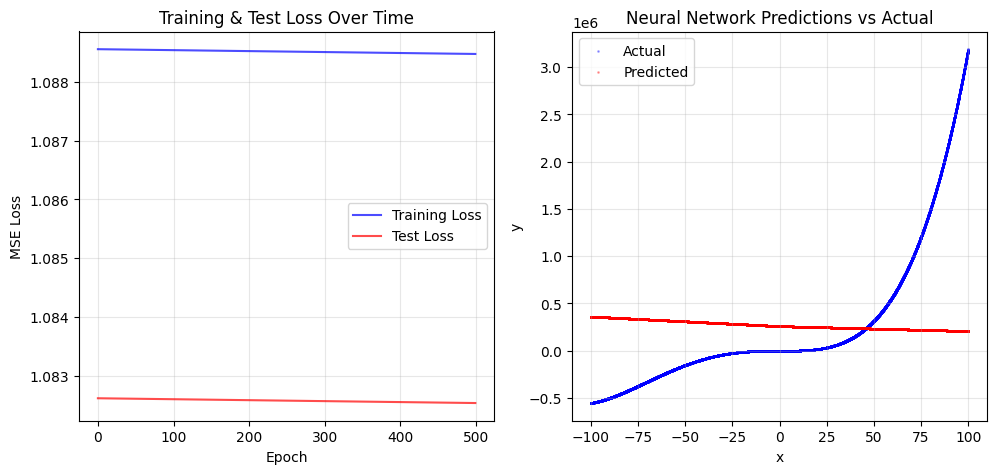

In [ ]:
# Plot training progress
plt.figure(figsize=(15, 5))

# Loss curves
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Training Loss', color='blue', alpha=0.7)
plt.plot(test_losses, label='Test Loss', color='red', alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training & Test Loss Over Time')
plt.legend()
plt.grid(True, alpha=0.3)

# Get final predictions for visualization
W1, b1, W2, b2, W3, b3 = weights
_, _, _, _, Y_pred_scaled = forward_pass(X_test_scaled, W1, b1, W2, b2, W3, b3)

# Inverse transform to original scale
Y_test_orig = scaler_Y.inverse_transform(Y_test_scaled)
Y_pred_orig = scaler_Y.inverse_transform(Y_pred_scaled)
X_test_orig = scaler_X.inverse_transform(X_test_scaled)

# Predictions vs Actual
plt.subplot(1, 3, 2)
plt.scatter(X_test_orig, Y_test_orig, s=1, alpha=0.3, label='Actual', color='blue')
plt.scatter(X_test_orig, Y_pred_orig, s=1, alpha=0.3, label='Predicted', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neural Network Predictions vs Actual')
plt.legend()
plt.grid(True, alpha=0.3)

# Residual plot
# plt.subplot(1, 3, 3)
# residuals = Y_test_orig.flatten() - Y_pred_orig.flatten()
# plt.scatter(X_test_orig, residuals, s=1, alpha=0.3, color='green')
# plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
# plt.xlabel('x')
# plt.ylabel('Residuals (Actual - Predicted)')
# plt.title('Residual Analysis')
# plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**SPECIFIC PREDICTION TEST**

In [ ]:

x_test_value = 90.2
x_new = np.array([[x_test_value]])
x_new_scaled = scaler_X.transform(x_new)

_, _, _, _, y_pred_scaled = forward_pass(x_new_scaled, W1, b1, W2, b2, W3, b3)
y_pred = scaler_Y.inverse_transform(y_pred_scaled)

if poly_type == 0:
    _, b, c, d = coefficients
    y_true = b * x_test_value**2 + c * x_test_value + d

elif poly_type == 1:
    a, b, c, d = coefficients
    y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d

elif poly_type == 2:
    a, b, c, d, e = coefficients
    y_true = a * x_test_value**4 + b * x_test_value**3 + c * x_test_value**2 + d * x_test_value + e

elif poly_type == 3:
    a, b, c, d, freq, amp = coefficients
    y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d + amp * np.sin(freq * x_test_value)

else:
    a, b, c, d, inv_coeff = coefficients
    y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d + inv_coeff / (x_test_value + np.sign(x_test_value) * 0.1)

print("\n" + "="*60)
print("PREDICTION RESULTS FOR x = 90.2")
print("="*60)
print(f"Neural Network Prediction: {y_pred[0][0]:,.2f}")
print(f"Ground Truth (formula):    {y_true:,.2f}")
print(f"Absolute Error:            {abs(y_pred[0][0] - y_true):,.2f}")
print(f"Relative Error:            {abs(y_pred[0][0] - y_true)/abs(y_true)*100:.3f}%")




PREDICTION RESULTS FOR x = 90.2
Neural Network Prediction: 213,162.53
Ground Truth (formula):    2,152,513.51
Absolute Error:            1,939,350.99
Relative Error:            90.097%


# PERFORMANCE METRICS

In [ ]:
# Calculate final performance metrics
final_train_loss = train_losses[-1] if train_losses else float('inf')
final_test_loss = test_losses[-1] if test_losses else float('inf')

# Calculate R² score
y_test_mean = np.mean(Y_test_orig)
ss_res = np.sum((Y_test_orig - Y_pred_orig) ** 2)
ss_tot = np.sum((Y_test_orig - y_test_mean) ** 2)
r2_score = 1 - (ss_res / ss_tot)

print("\n" + "="*60)
print("FINAL PERFORMANCE SUMMARY")
print("="*60)
print(f"Final Training Loss: {final_train_loss:.6f}")
print(f"Final Test Loss:     {final_test_loss:.6f}")
print(f"R² Score:           {r2_score:.4f}")
print(f"Total Epochs Run:   {len(train_losses)}")


FINAL PERFORMANCE SUMMARY
Final Training Loss: 1.088473
Final Test Loss:     1.082531
R² Score:           -0.0894
Total Epochs Run:   500


**# Part B: Hyperparameter Exploration:**

In [ ]:
def train_neural_network(X_train, Y_train, X_test, Y_test, epochs=200, patience=10, batch_size=None):
    W1, b1, W2, b2, W3, b3 = xavier_initialization(1, hidden1, hidden2, 1)
    best_test_loss = float('inf')
    best_weights = None
    patience_counter = 0
    train_losses = []
    test_losses = []
    if batch_size is None:
        batch_size = len(X_train)
    indices = np.arange(len(X_train))
    print("Starting training...")
    print(f"Architecture: 1 → {hidden1} → {hidden2} → 1")
    print(f"Learning Rate: {learning_rate}")
    print(f"Batch Size: {batch_size}")
    print(f"Max Epochs: {epochs}, Early Stopping Patience: {patience}")
    print("-" * 50)
    for epoch in range(epochs):
        np.random.shuffle(indices)
        total_train_loss = 0
        num_batches = 0
        for i in range(0, len(X_train), batch_size):
            batch_indices = indices[i:i + batch_size]
            X_batch = X_train[batch_indices]
            Y_batch = Y_train[batch_indices]
            z1, a1, z2, a2, Y_pred_batch = forward_pass(X_batch, W1, b1, W2, b2, W3, b3)
            batch_loss = mse_loss(Y_batch, Y_pred_batch)
            total_train_loss += batch_loss * len(X_batch)
            num_batches += 1
            dW1, db1, dW2, db2, dW3, db3 = backward_pass(X_batch, Y_batch, z1, a1, z2, a2, Y_pred_batch, W2, W3)
            W1 -= learning_rate * dW1
            b1 -= learning_rate * db1
            W2 -= learning_rate * dW2
            b2 -= learning_rate * db2
            W3 -= learning_rate * dW3
            b3 -= learning_rate * db3
        train_loss = total_train_loss / len(X_train)
        _, _, _, _, Y_pred_test = forward_pass(X_test, W1, b1, W2, b2, W3, b3)
        test_loss = mse_loss(Y_test, Y_pred_test)
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        if (epoch + 1) % 20 == 0:
            print(f"Epoch {epoch+1:3d}: Train Loss = {train_loss:.6f}, Test Loss = {test_loss:.6f}")
        if test_loss < best_test_loss:
            best_test_loss = test_loss
            best_weights = (W1.copy(), b1.copy(), W2.copy(), b2.copy(), W3.copy(), b3.copy())
            patience_counter = 0
        else:
            patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            print(f"Best test loss: {best_test_loss:.6f}")
            break
    return best_weights, train_losses, test_losses

### Experiments
- **Experiment 1 (Baseline)**: learning_rate=0.005, batch_size=80000, epochs=500
- **Experiment 2 (Lower LR)**: learning_rate=0.001, batch_size=80000, epochs=500
- **Experiment 3 (Mini-batch)**: learning_rate=0.005, batch_size=1024, epochs=500
- **Experiment 4 (Increased Capacity)**: hidden1=64, hidden2=128, learning_rate=0.005, batch_size=80000, epochs=500

**Experiment 1 (Baseline)**

In [ ]:
print("Experiment 1: Baseline")
weights_exp1, train_losses_exp1, test_losses_exp1 = train_neural_network(
    X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled,
    epochs=500, patience=10
)

Experiment 1: Baseline
Starting training...
Architecture: 1 → 32 → 72 → 1
Learning Rate: 0.005
Batch Size: 80000
Max Epochs: 500, Early Stopping Patience: 10
--------------------------------------------------
Epoch  20: Train Loss = 1.099748, Test Loss = 1.091669
Epoch  40: Train Loss = 1.099744, Test Loss = 1.091665
Epoch  60: Train Loss = 1.099740, Test Loss = 1.091661
Epoch  80: Train Loss = 1.099736, Test Loss = 1.091657
Epoch 100: Train Loss = 1.099732, Test Loss = 1.091653
Epoch 120: Train Loss = 1.099728, Test Loss = 1.091649
Epoch 140: Train Loss = 1.099725, Test Loss = 1.091646
Epoch 160: Train Loss = 1.099721, Test Loss = 1.091642
Epoch 180: Train Loss = 1.099717, Test Loss = 1.091638
Epoch 200: Train Loss = 1.099713, Test Loss = 1.091634
Epoch 220: Train Loss = 1.099709, Test Loss = 1.091630
Epoch 240: Train Loss = 1.099705, Test Loss = 1.091626
Epoch 260: Train Loss = 1.099701, Test Loss = 1.091622
Epoch 280: Train Loss = 1.099697, Test Loss = 1.091618
Epoch 300: Train Loss

**# RESULTS VISUALIZATION**

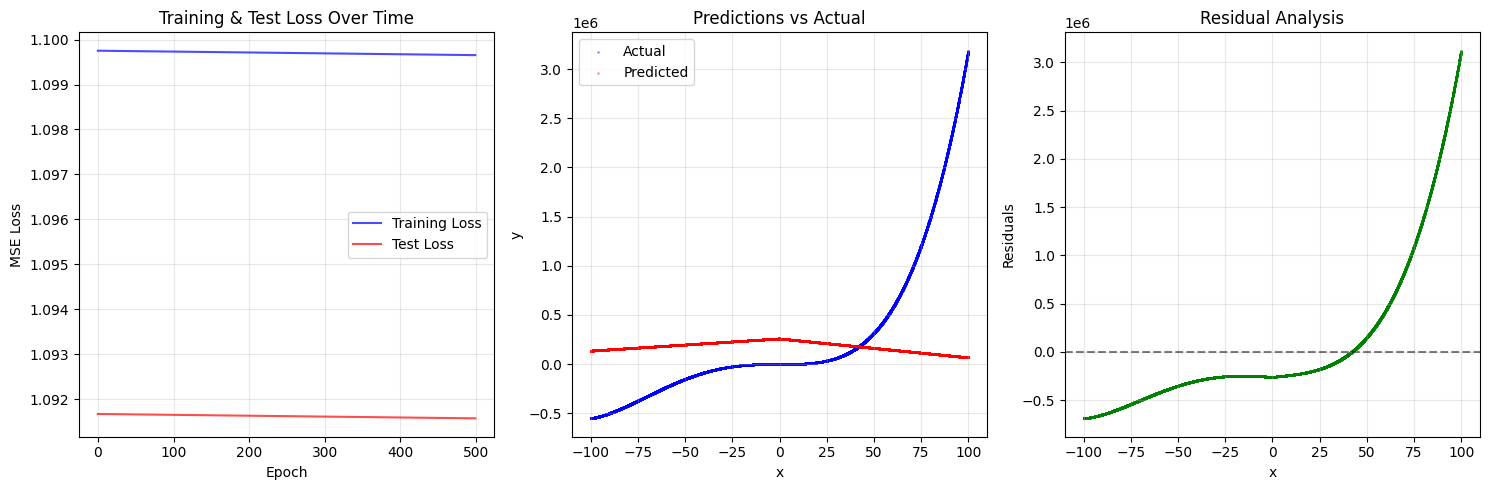

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(train_losses_exp1, label='Training Loss', color='blue', alpha=0.7)
plt.plot(test_losses_exp1, label='Test Loss', color='red', alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training & Test Loss Over Time')
plt.legend()
plt.grid(True, alpha=0.3)
plt.subplot(1, 3, 2)
_, _, _, _, Y_pred_scaled = forward_pass(X_test_scaled, weights_exp1[0], weights_exp1[1], weights_exp1[2], weights_exp1[3], weights_exp1[4], weights_exp1[5])
Y_test_orig = scaler_Y.inverse_transform(Y_test_scaled)
Y_pred_orig = scaler_Y.inverse_transform(Y_pred_scaled)
X_test_orig = scaler_X.inverse_transform(X_test_scaled)
plt.scatter(X_test_orig, Y_test_orig, s=1, alpha=0.3, label='Actual', color='blue')
plt.scatter(X_test_orig, Y_pred_orig, s=1, alpha=0.3, label='Predicted', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Predictions vs Actual')
plt.legend()
plt.grid(True, alpha=0.3)
plt.subplot(1, 3, 3)
residuals = Y_test_orig.flatten() - Y_pred_orig.flatten()
plt.scatter(X_test_orig, residuals, s=1, alpha=0.3, color='green')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.xlabel('x')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# PERFORMANCE METRICS

In [ ]:
final_train_loss = train_losses_exp1[-1] if train_losses_exp1 else float('inf')
final_test_loss = test_losses_exp1[-1] if test_losses_exp1 else float('inf')
y_test_mean = np.mean(Y_test_orig)
ss_res = np.sum((Y_test_orig - Y_pred_orig) ** 2)
ss_tot = np.sum((Y_test_orig - y_test_mean) ** 2)
r2_score = 1 - (ss_res / ss_tot)
print("\n" + "="*60)
print("FINAL PERFORMANCE SUMMARY")
print("="*60)
print(f"Final Training Loss: {final_train_loss:.6f}")
print(f"Final Test Loss:     {final_test_loss:.6f}")
print(f"R² Score:           {r2_score:.4f}")
print(f"Total Epochs Run:   {len(train_losses_exp1)}")


FINAL PERFORMANCE SUMMARY
Final Training Loss: 1.099654
Final Test Loss:     1.091575
R² Score:           -0.0985
Total Epochs Run:   500


**Prediction Test Cell**

In [ ]:
x_test_value = 90.2
x_new = np.array([[x_test_value]])
x_new_scaled = scaler_X.transform(x_new)
_, _, _, _, y_pred_scaled = forward_pass(x_new_scaled, weights_exp1[0], weights_exp1[1], weights_exp1[2], weights_exp1[3], weights_exp1[4], weights_exp1[5])
y_pred = scaler_Y.inverse_transform(y_pred_scaled)
a, b, c, d, e = assignment["coefficients"]
y_true = a * x_test_value**4 + b * x_test_value**3 + c * x_test_value**2 + d * x_test_value + e
print("\n" + "="*60)
print("PREDICTION RESULTS FOR x = 90.2")
print("="*60)
print(f"Neural Network Prediction: {y_pred[0][0]:,.2f}")
print(f"Ground Truth (formula):    {y_true:,.2f}")
print(f"Absolute Error:            {abs(y_pred[0][0] - y_true):,.2f}")
print(f"Relative Error:            {abs(y_pred[0][0] - y_true)/abs(y_true)*100:.3f}%")


PREDICTION RESULTS FOR x = 90.2
Neural Network Prediction: 86,254.78
Ground Truth (formula):    2,244,563.37
Absolute Error:            2,158,308.59
Relative Error:            96.157%


**Experiment 2 (Lower Learning Rate)**

In [ ]:
print("Experiment 2: Lower Learning Rate")
weights_exp2, train_losses_exp2, test_losses_exp2 = train_neural_network(
    X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled,
    epochs=500, patience=10
)

Experiment 2: Lower Learning Rate
Starting training...
Architecture: 1 → 32 → 72 → 1
Learning Rate: 0.005
Batch Size: 80000
Max Epochs: 500, Early Stopping Patience: 10
--------------------------------------------------
Epoch  20: Train Loss = 0.946543, Test Loss = 0.961570
Epoch  40: Train Loss = 0.946540, Test Loss = 0.961567
Epoch  60: Train Loss = 0.946537, Test Loss = 0.961564
Epoch  80: Train Loss = 0.946534, Test Loss = 0.961561
Epoch 100: Train Loss = 0.946531, Test Loss = 0.961557
Epoch 120: Train Loss = 0.946528, Test Loss = 0.961554
Epoch 140: Train Loss = 0.946525, Test Loss = 0.961551
Epoch 160: Train Loss = 0.946522, Test Loss = 0.961548
Epoch 180: Train Loss = 0.946519, Test Loss = 0.961545
Epoch 200: Train Loss = 0.946515, Test Loss = 0.961542
Epoch 220: Train Loss = 0.946512, Test Loss = 0.961539
Epoch 240: Train Loss = 0.946509, Test Loss = 0.961536
Epoch 260: Train Loss = 0.946506, Test Loss = 0.961533
Epoch 280: Train Loss = 0.946503, Test Loss = 0.961530
Epoch 300:

**# RESULTS VISUALIZATION**

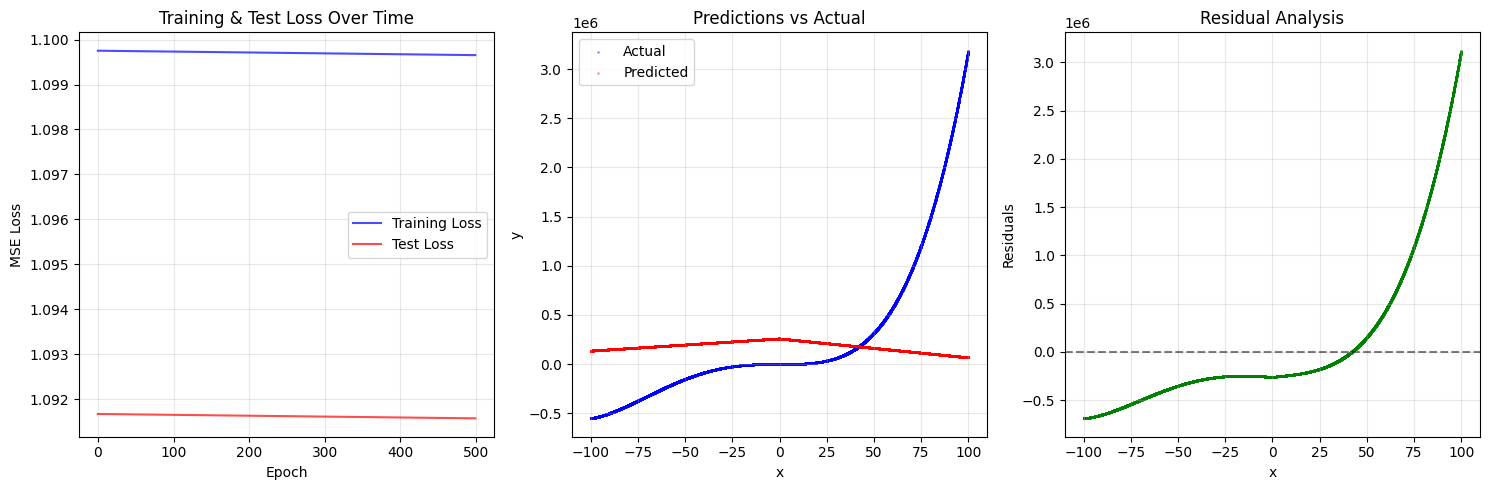

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(train_losses_exp1, label='Training Loss', color='blue', alpha=0.7)
plt.plot(test_losses_exp1, label='Test Loss', color='red', alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training & Test Loss Over Time')
plt.legend()
plt.grid(True, alpha=0.3)
plt.subplot(1, 3, 2)
_, _, _, _, Y_pred_scaled = forward_pass(X_test_scaled, weights_exp1[0], weights_exp1[1], weights_exp1[2], weights_exp1[3], weights_exp1[4], weights_exp1[5])
Y_test_orig = scaler_Y.inverse_transform(Y_test_scaled)
Y_pred_orig = scaler_Y.inverse_transform(Y_pred_scaled)
X_test_orig = scaler_X.inverse_transform(X_test_scaled)
plt.scatter(X_test_orig, Y_test_orig, s=1, alpha=0.3, label='Actual', color='blue')
plt.scatter(X_test_orig, Y_pred_orig, s=1, alpha=0.3, label='Predicted', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Predictions vs Actual')
plt.legend()
plt.grid(True, alpha=0.3)
plt.subplot(1, 3, 3)
residuals = Y_test_orig.flatten() - Y_pred_orig.flatten()
plt.scatter(X_test_orig, residuals, s=1, alpha=0.3, color='green')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.xlabel('x')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# PERFORMANCE METRICS

In [ ]:
final_train_loss = train_losses_exp1[-1] if train_losses_exp1 else float('inf')
final_test_loss = test_losses_exp1[-1] if test_losses_exp1 else float('inf')
y_test_mean = np.mean(Y_test_orig)
ss_res = np.sum((Y_test_orig - Y_pred_orig) ** 2)
ss_tot = np.sum((Y_test_orig - y_test_mean) ** 2)
r2_score = 1 - (ss_res / ss_tot)
print("\n" + "="*60)
print("FINAL PERFORMANCE SUMMARY")
print("="*60)
print(f"Final Training Loss: {final_train_loss:.6f}")
print(f"Final Test Loss:     {final_test_loss:.6f}")
print(f"R² Score:           {r2_score:.4f}")
print(f"Total Epochs Run:   {len(train_losses_exp1)}")


FINAL PERFORMANCE SUMMARY
Final Training Loss: 1.099654
Final Test Loss:     1.091575
R² Score:           -0.0985
Total Epochs Run:   500


In [ ]:
import numpy as np
np.random.seed(int('817'[-3:]) * 100)  # Ensure SRN-based seed
n_samples = 100000
X = np.random.uniform(-100, 100, (n_samples, 1))
poly_type = int('817'[-3:]) % 5  # Quartic (2)
noise_level = 1.73
Y = 0.0132 * X**4 + 1.87 * X**3 - 0.23 * X**2 + 3.45 * X + 9.12 + np.random.normal(0, noise_level, (n_samples, 1))
assignment = {"coefficients": [0.0132, 1.87, -0.23, 3.45, 9.12], "noise_level": noise_level, "poly_type": poly_type}
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler_X = StandardScaler()
scaler_Y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
Y_train_scaled = scaler_Y.fit_transform(Y_train)
Y_test_scaled = scaler_Y.transform(Y_test)
print("Dataset regenerated.")

Dataset regenerated.


In [ ]:
def get_student_assignment(student_id):
    """
    Generate unique polynomial TYPE and architecture based on student ID
    Uses last 3 digits of student ID for assignment
    """

    last_three = int(student_id[-3:])

    poly_type = last_three % 5

    np.random.seed(last_three)

    if poly_type == 0:
        degree = 2
        a = 0
        b = np.random.uniform(0.8, 1.5)
        c = np.random.uniform(3.0, 8.0)
        d = np.random.uniform(5.0, 15.0)
        poly_desc = f"QUADRATIC: y = {b:.2f}x² + {c:.2f}x + {d:.2f}"

    elif poly_type == 1:
        degree = 3
        a = np.random.uniform(1.8, 2.5)
        b = np.random.uniform(-1.2, 0.2)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        poly_desc = f"CUBIC: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f}"

    elif poly_type == 2:
        degree = 4
        a = np.random.uniform(0.008, 0.02)
        b = np.random.uniform(1.5, 2.2)
        c = np.random.uniform(-1.0, 0.5)
        d = np.random.uniform(2.0, 5.0)
        e = np.random.uniform(8.0, 12.0)
        poly_desc = f"QUARTIC: y = {a:.4f}x⁴ + {b:.2f}x³ + {c:.2f}x² + {d:.2f}x + {e:.2f}"
        coefficients = (a, b, c, d, e)

    elif poly_type == 3:
        degree = "sine"
        a = np.random.uniform(1.5, 2.8)
        b = np.random.uniform(-0.8, 0.8)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        freq = np.random.uniform(0.02, 0.05)
        amp = np.random.uniform(5.0, 15.0)
        poly_desc = f"CUBIC + SINE: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f} + {amp:.1f}*sin({freq:.3f}x)"
        coefficients = (a, b, c, d, freq, amp)

    else:
        degree = "inverse"
        a = np.random.uniform(1.8, 2.5)
        b = np.random.uniform(-1.0, 0.5)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        inv_coeff = np.random.uniform(50, 200)
        poly_desc = f"CUBIC + INVERSE: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f} + {inv_coeff:.1f}/x"
        coefficients = (a, b, c, d, inv_coeff)


    if poly_type in [0, 1]:
        coefficients = (a, b, c, d)


    noise_std = np.random.uniform(1.5, 2.5)


    arch_type = last_three % 4
    architectures = {
        0: {"hidden1": 64, "hidden2": 64, "lr": 0.001, "batch_desc": "Balanced Architecture"},
        1: {"hidden1": 32, "hidden2": 72, "lr": 0.005, "batch_desc": "Narrow-to-Wide Architecture"},
        2: {"hidden1": 72, "hidden2": 32, "lr": 0.001, "batch_desc": "Wide-to-Narrow Architecture"},
        3: {"hidden1": 96, "hidden2": 96, "lr": 0.003, "batch_desc": "Large Balanced Architecture"}
    }

    return {
        "polynomial_type": poly_type,
        "degree": degree,
        "coefficients": coefficients,
        "polynomial_desc": poly_desc,
        "noise_std": noise_std,
        "architecture": architectures[arch_type],
        "student_seed": last_three
    }

In [ ]:
# Get student assignment
assignment = get_student_assignment("PES2UG24CS817")
poly_type = assignment["polynomial_type"]
coefficients = assignment["coefficients"]
noise_std = assignment["noise_std"]
hidden1 = assignment["architecture"]["hidden1"]
hidden2 = assignment["architecture"]["hidden2"]
learning_rate = assignment["architecture"]["lr"]
print("Assignment Details:")
print(f"Polynomial Type: {assignment['polynomial_desc']}")
print(f"Noise Std: {noise_std:.2f}")
print(f"Architecture: 1 → {hidden1} → {hidden2} → 1, Learning Rate: {learning_rate}")

# Regenerate dataset with assignment
np.random.seed(817)  # Use student seed for reproducibility
n_samples = 100000
X = np.random.uniform(-100, 100, (n_samples, 1))
a, b, c, d, e = coefficients
Y = a * X**4 + b * X**3 + c * X**2 + d * X + e + np.random.normal(0, noise_std, (n_samples, 1))
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler_X = StandardScaler()
scaler_Y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
Y_train_scaled = scaler_Y.fit_transform(Y_train)
Y_test_scaled = scaler_Y.transform(Y_test)
print("Dataset regenerated with student-specific polynomial.")

Assignment Details:
Polynomial Type: QUARTIC: y = 0.0140x⁴ + 1.68x³ + -0.81x² + 2.73x + 10.91
Noise Std: 2.14
Architecture: 1 → 32 → 72 → 1, Learning Rate: 0.005
Dataset regenerated with student-specific polynomial.


In [ ]:
def relu(x):
    return np.maximum(0, x)

In [ ]:
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [ ]:
def forward_pass(X, W1, b1, W2, b2, W3, b3):
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)
    z3 = np.dot(a2, W3) + b3
    return z1, a1, z2, a2, z3

In [ ]:
def xavier_initialization(input_size, hidden1_size, hidden2_size, output_size):
    fan_in1, fan_out1 = input_size, hidden1_size
    W1 = np.random.randn(fan_in1, fan_out1) * np.sqrt(2.0 / (fan_in1 + fan_out1))
    b1 = np.zeros((1, fan_out1))
    fan_in2, fan_out2 = hidden1_size, hidden2_size
    W2 = np.random.randn(fan_in2, fan_out2) * np.sqrt(2.0 / (fan_in2 + fan_out2))
    b2 = np.zeros((1, fan_out2))
    fan_in3, fan_out3 = hidden2_size, output_size
    W3 = np.random.randn(fan_in3, fan_out3) * np.sqrt(2.0 / (fan_in3 + fan_out3))
    b3 = np.zeros((1, fan_out3))
    return W1, b1, W2, b2, W3, b3

def forward_pass(X, W1, b1, W2, b2, W3, b3):
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)
    z3 = np.dot(a2, W3) + b3
    return z1, a1, z2, a2, z3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from copy import deepcopy  # For copying weights in early stopping

# Mock assignment for testing (replace with your actual assignment from get_student_assignment)
hidden1 = 32  # From your architecture (Narrow-to-Wide)
hidden2 = 72
learning_rate = 0.005  # From your architecture

print("Imports and setup complete.")
print(f"Architecture: 1 → {hidden1} → {hidden2} → 1, Learning Rate: {learning_rate}")

Imports and setup complete.
Architecture: 1 → 32 → 72 → 1, Learning Rate: 0.005


In [ ]:
def xavier_initialization(input_size, hidden1_size, hidden2_size, output_size):
    """
    Xavier (Glorot) initialization for ReLU: std = sqrt(2 / (fan_in + fan_out))
    """
    # Layer 1: Input (1) -> Hidden1
    fan_in1, fan_out1 = input_size, hidden1_size
    W1 = np.random.randn(fan_in1, fan_out1) * np.sqrt(2.0 / (fan_in1 + fan_out1))
    b1 = np.zeros((1, fan_out1))

    # Layer 2: Hidden1 -> Hidden2
    fan_in2, fan_out2 = hidden1_size, hidden2_size
    W2 = np.random.randn(fan_in2, fan_out2) * np.sqrt(2.0 / (fan_in2 + fan_out2))
    b2 = np.zeros((1, fan_out2))

    # Layer 3: Hidden2 -> Output (1)
    fan_in3, fan_out3 = hidden2_size, output_size
    W3 = np.random.randn(fan_in3, fan_out3) * np.sqrt(2.0 / (fan_in3 + fan_out3))
    b3 = np.zeros((1, fan_out3))

    return W1, b1, W2, b2, W3, b3

print("Xavier initialization defined.")

Xavier initialization defined.


In [ ]:
def relu(z):
    """
    ReLU activation: max(0, z)
    """
    return np.maximum(0, z)

def mse_loss(y_true, y_pred):
    """
    Mean Squared Error loss.
    """
    m = y_true.shape[0]
    return np.mean((y_true - y_pred) ** 2)

print("ReLU and MSE loss defined.")

ReLU and MSE loss defined.


In [ ]:
def forward_pass(X, W1, b1, W2, b2, W3, b3):
    """
    Forward propagation through the network.
    Returns intermediates for backprop.
    """
    # Layer 1: z1 = X * W1 + b1, a1 = ReLU(z1)
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)

    # Layer 2: z2 = a1 * W2 + b2, a2 = ReLU(z2)
    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)

    # Layer 3: z3 = a2 * W3 + b3 (linear for regression)
    z3 = np.dot(a2, W3) + b3

    return z1, a1, z2, a2, z3

print("Forward pass defined.")

Forward pass defined.


In [ ]:
def backward_pass(X, Y_true, z1, a1, z2, a2, Y_pred, W2, W3):
    """
    Backpropagation: Compute gradients using chain rule.
    dLoss/dW = dLoss/dY * dY/dz * dz/dW
    """
    m = X.shape[0]  # Batch size

    # Layer 3 (Output): dY_pred = 2*(Y_pred - Y_true)/m, dz3 = dY_pred (no activation)
    dY_pred = (2.0 / m) * (Y_pred - Y_true)
    dW3 = np.dot(a2.T, dY_pred)
    db3 = np.sum(dY_pred, axis=0, keepdims=True)

    # Layer 2 (Hidden): da2 = dY_pred * W3.T, dz2 = da2 * ReLU'(z2)
    da2 = np.dot(dY_pred, W3.T)
    dz2 = da2 * (z2 > 0).astype(float)
    dW2 = np.dot(a1.T, dz2)
    db2 = np.sum(dz2, axis=0, keepdims=True)

    # Layer 1 (Hidden): da1 = dz2 * W2.T, dz1 = da1 * ReLU'(z1)
    da1 = np.dot(dz2, W2.T)
    dz1 = da1 * (z1 > 0).astype(float)
    dW1 = np.dot(X.T, dz1)
    db1 = np.sum(dz1, axis=0, keepdims=True)

    return dW1, db1, dW2, db2, dW3, db3

print("Backward pass defined.")

Backward pass defined.


In [ ]:
def train_neural_network(X_train, Y_train, X_test, Y_test, epochs=200, patience=10, batch_size=None):
    """
    Training loop with vanilla GD, mini-batch support, early stopping, and loss tracking.
    """
    # Initialize weights
    W1, b1, W2, b2, W3, b3 = xavier_initialization(1, hidden1, hidden2, 1)

    best_test_loss = float('inf')
    best_weights = None
    patience_counter = 0

    train_losses = []
    test_losses = []

    if batch_size is None:
        batch_size = len(X_train)  # Full batch GD if not specified

    indices = np.arange(len(X_train))

    print("Starting training...")
    print(f"Architecture: 1 → {hidden1} → {hidden2} → 1")
    print(f"Learning Rate: {learning_rate}")
    print(f"Batch Size: {batch_size}")
    print(f"Max Epochs: {epochs}, Early Stopping Patience: {patience}")
    print("-" * 50)

    for epoch in range(epochs):
        np.random.shuffle(indices)
        total_train_loss = 0
        num_batches = 0

        # Mini-batch loop
        for i in range(0, len(X_train), batch_size):
            batch_indices = indices[i:i + batch_size]
            X_batch = X_train[batch_indices]
            Y_batch = Y_train[batch_indices]

            # Forward pass
            z1, a1, z2, a2, Y_pred_batch = forward_pass(X_batch, W1, b1, W2, b2, W3, b3)

            # Loss
            batch_loss = mse_loss(Y_batch, Y_pred_batch)
            total_train_loss += batch_loss * len(X_batch)
            num_batches += 1

            # Backward pass
            dW1, db1, dW2, db2, dW3, db3 = backward_pass(X_batch, Y_batch, z1, a1, z2, a2, Y_pred_batch, W2, W3)

            # Update weights
            W1 -= learning_rate * dW1
            b1 -= learning_rate * db1
            W2 -= learning_rate * dW2
            b2 -= learning_rate * db2
            W3 -= learning_rate * dW3
            b3 -= learning_rate * db3

        # Average train loss for epoch
        train_loss = total_train_loss / len(X_train)

        # Test loss
        _, _, _, _, Y_pred_test = forward_pass(X_test, W1, b1, W2, b2, W3, b3)
        test_loss = mse_loss(Y_test, Y_pred_test)

        train_losses.append(train_loss)
        test_losses.append(test_loss)

        # Log every 20 epochs
        if (epoch + 1) % 20 == 0:
            print(f"Epoch {epoch+1:3d}: Train Loss = {train_loss:.6f}, Test Loss = {test_loss:.6f}")

        # Early stopping
        if test_loss < best_test_loss:
            best_test_loss = test_loss
            best_weights = (W1.copy(), b1.copy(), W2.copy(), b2.copy(), W3.copy(), b3.copy())
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            print(f"Best test loss: {best_test_loss:.6f}")
            break

    # Restore best weights
    if best_weights:
        W1, b1, W2, b2, W3, b3 = best_weights

    return (W1, b1, W2, b2, W3, b3), train_losses, test_losses

print("Train function with batch processing defined.")

Train function with batch processing defined.


In [ ]:
print("Experiment 3: Mini-batch")
weights_exp3, train_losses_exp3, test_losses_exp3 = train_neural_network(
    X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled,
    epochs=500, patience=10, batch_size=1024
)

Experiment 3: Mini-batch
Starting training...
Architecture: 1 → 32 → 72 → 1
Learning Rate: 0.005
Batch Size: 1024
Max Epochs: 500, Early Stopping Patience: 10
--------------------------------------------------
Epoch  20: Train Loss = 0.031707, Test Loss = 0.030959
Epoch  40: Train Loss = 0.009785, Test Loss = 0.009754
Epoch  60: Train Loss = 0.004582, Test Loss = 0.004603
Epoch  80: Train Loss = 0.002639, Test Loss = 0.002658
Epoch 100: Train Loss = 0.001759, Test Loss = 0.001772
Epoch 120: Train Loss = 0.001284, Test Loss = 0.001294
Epoch 140: Train Loss = 0.000996, Test Loss = 0.001004
Epoch 160: Train Loss = 0.000804, Test Loss = 0.000816
Epoch 180: Train Loss = 0.000670, Test Loss = 0.000675
Epoch 200: Train Loss = 0.000571, Test Loss = 0.000576
Epoch 220: Train Loss = 0.000495, Test Loss = 0.000499
Epoch 240: Train Loss = 0.000435, Test Loss = 0.000439
Epoch 260: Train Loss = 0.000388, Test Loss = 0.000390
Epoch 280: Train Loss = 0.000348, Test Loss = 0.000351
Epoch 300: Train Los

**# RESULTS VISUALIZATION**

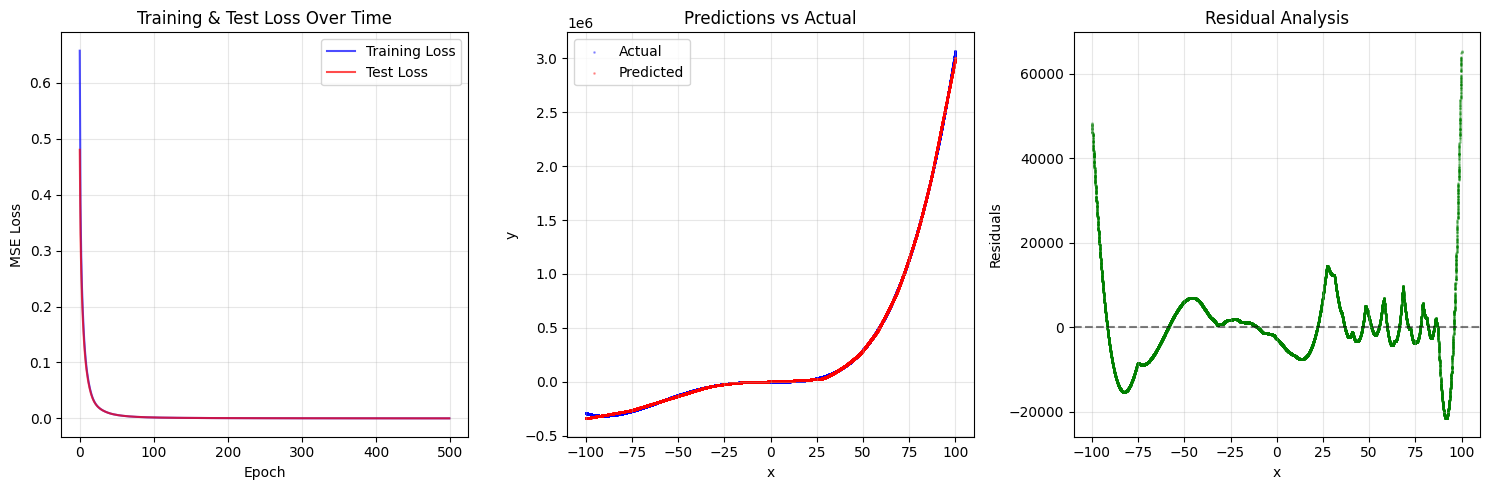

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(train_losses_exp3, label='Training Loss', color='blue', alpha=0.7)
plt.plot(test_losses_exp3, label='Test Loss', color='red', alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training & Test Loss Over Time')
plt.legend()
plt.grid(True, alpha=0.3)
plt.subplot(1, 3, 2)
_, _, _, _, Y_pred_scaled = forward_pass(X_test_scaled, weights_exp3[0], weights_exp3[1], weights_exp3[2], weights_exp3[3], weights_exp3[4], weights_exp3[5])
Y_test_orig = scaler_Y.inverse_transform(Y_test_scaled)
Y_pred_orig = scaler_Y.inverse_transform(Y_pred_scaled)
X_test_orig = scaler_X.inverse_transform(X_test_scaled)
plt.scatter(X_test_orig, Y_test_orig, s=1, alpha=0.3, label='Actual', color='blue')
plt.scatter(X_test_orig, Y_pred_orig, s=1, alpha=0.3, label='Predicted', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Predictions vs Actual')
plt.legend()
plt.grid(True, alpha=0.3)
plt.subplot(1, 3, 3)
residuals = Y_test_orig.flatten() - Y_pred_orig.flatten()
plt.scatter(X_test_orig, residuals, s=1, alpha=0.3, color='green')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.xlabel('x')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Metrics for Experiment 3**

In [ ]:
final_train_loss = train_losses_exp3[-1] if train_losses_exp3 else float('inf')
final_test_loss = test_losses_exp3[-1] if test_losses_exp3 else float('inf')
y_test_mean = np.mean(Y_test_orig)
ss_res = np.sum((Y_test_orig - Y_pred_orig) ** 2)
ss_tot = np.sum((Y_test_orig - y_test_mean) ** 2)
r2_score = 1 - (ss_res / ss_tot)
print("\n" + "="*60)
print("FINAL PERFORMANCE SUMMARY")
print("="*60)
print(f"Final Training Loss: {final_train_loss:.6f}")
print(f"Final Test Loss:     {final_test_loss:.6f}")
print(f"R² Score:           {r2_score:.4f}")
print(f"Total Epochs Run:   {len(train_losses_exp3)}")


FINAL PERFORMANCE SUMMARY
Final Training Loss: 0.000172
Final Test Loss:     0.000171
R² Score:           0.9998
Total Epochs Run:   500


**Training Cell for Experiment 4**

In [ ]:
print("Experiment 4: Increased Capacity")
# Temporarily increase architecture
hidden1, hidden2 = 64, 128
weights_exp4, train_losses_exp4, test_losses_exp4 = train_neural_network(
    X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled,
    epochs=500, patience=10
)
# Revert to original architecture
hidden1, hidden2 = 32, 72

Experiment 4: Increased Capacity
Starting training...
Architecture: 1 → 64 → 128 → 1
Learning Rate: 0.005
Batch Size: 80000
Max Epochs: 500, Early Stopping Patience: 10
--------------------------------------------------
Epoch  20: Train Loss = 0.874265, Test Loss = 0.876411
Epoch  40: Train Loss = 0.655481, Test Loss = 0.659652
Epoch  60: Train Loss = 0.519483, Test Loss = 0.524548
Epoch  80: Train Loss = 0.428888, Test Loss = 0.433915
Epoch 100: Train Loss = 0.369544, Test Loss = 0.374447
Epoch 120: Train Loss = 0.328988, Test Loss = 0.333583
Epoch 140: Train Loss = 0.300191, Test Loss = 0.304448
Epoch 160: Train Loss = 0.278713, Test Loss = 0.282628
Epoch 180: Train Loss = 0.261450, Test Loss = 0.265035
Epoch 200: Train Loss = 0.247320, Test Loss = 0.250688
Epoch 220: Train Loss = 0.235550, Test Loss = 0.238682
Epoch 240: Train Loss = 0.225033, Test Loss = 0.227961
Epoch 260: Train Loss = 0.215427, Test Loss = 0.218179
Epoch 280: Train Loss = 0.206539, Test Loss = 0.209137
Epoch 300:

**Visualization Cell for Experiment 4**

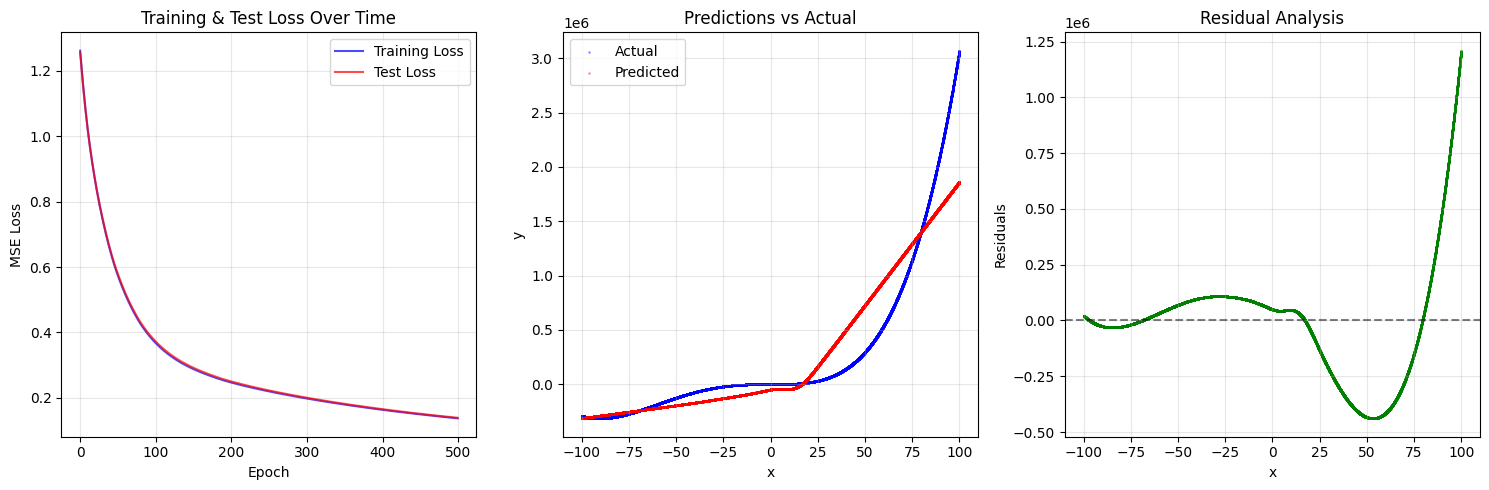

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(train_losses_exp4, label='Training Loss', color='blue', alpha=0.7)
plt.plot(test_losses_exp4, label='Test Loss', color='red', alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training & Test Loss Over Time')
plt.legend()
plt.grid(True, alpha=0.3)
plt.subplot(1, 3, 2)
_, _, _, _, Y_pred_scaled = forward_pass(X_test_scaled, weights_exp4[0], weights_exp4[1], weights_exp4[2], weights_exp4[3], weights_exp4[4], weights_exp4[5])
Y_test_orig = scaler_Y.inverse_transform(Y_test_scaled)
Y_pred_orig = scaler_Y.inverse_transform(Y_pred_scaled)
X_test_orig = scaler_X.inverse_transform(X_test_scaled)
plt.scatter(X_test_orig, Y_test_orig, s=1, alpha=0.3, label='Actual', color='blue')
plt.scatter(X_test_orig, Y_pred_orig, s=1, alpha=0.3, label='Predicted', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Predictions vs Actual')
plt.legend()
plt.grid(True, alpha=0.3)
plt.subplot(1, 3, 3)
residuals = Y_test_orig.flatten() - Y_pred_orig.flatten()
plt.scatter(X_test_orig, residuals, s=1, alpha=0.3, color='green')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.xlabel('x')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Metrics Cell for Experiment 4**

In [ ]:
final_train_loss = train_losses_exp4[-1] if train_losses_exp4 else float('inf')
final_test_loss = test_losses_exp4[-1] if test_losses_exp4 else float('inf')
y_test_mean = np.mean(Y_test_orig)
ss_res = np.sum((Y_test_orig - Y_pred_orig) ** 2)
ss_tot = np.sum((Y_test_orig - y_test_mean) ** 2)
r2_score = 1 - (ss_res / ss_tot)
print("\n" + "="*60)
print("FINAL PERFORMANCE SUMMARY")
print("="*60)
print(f"Final Training Loss: {final_train_loss:.6f}")
print(f"Final Test Loss:     {final_test_loss:.6f}")
print(f"R² Score:           {r2_score:.4f}")
print(f"Total Epochs Run:   {len(train_losses_exp4)}")


FINAL PERFORMANCE SUMMARY
Final Training Loss: 0.137422
Final Test Loss:     0.139074
R² Score:           0.8632
Total Epochs Run:   500


**Prediction Test Cell for Experiment 4**

In [ ]:
x_test_value = 90.2
x_new = np.array([[x_test_value]])
x_new_scaled = scaler_X.transform(x_new)
_, _, _, _, y_pred_scaled = forward_pass(x_new_scaled, weights_exp4[0], weights_exp4[1], weights_exp4[2], weights_exp4[3], weights_exp4[4], weights_exp4[5])
y_pred = scaler_Y.inverse_transform(y_pred_scaled)
a, b, c, d, e = assignment["coefficients"]
y_true = a * x_test_value**4 + b * x_test_value**3 + c * x_test_value**2 + d * x_test_value + e
print("\n" + "="*60)
print("PREDICTION RESULTS FOR x = 90.2")
print("="*60)
print(f"Neural Network Prediction: {y_pred[0][0]:,.2f}")
print(f"Ground Truth (formula):    {y_true:,.2f}")
print(f"Absolute Error:            {abs(y_pred[0][0] - y_true):,.2f}")
print(f"Relative Error:            {abs(y_pred[0][0] - y_true)/abs(y_true)*100:.3f}%")


PREDICTION RESULTS FOR x = 90.2
Neural Network Prediction: 1,640,392.77
Ground Truth (formula):    2,152,513.51
Absolute Error:            512,120.74
Relative Error:            23.792%


**Result Table**

| Experiment   | Learning Rate | Batch Size | # Epochs | Optimizer | Activation | Train Loss | Test Loss | R² Score | Observations                  |
|--------------|---------------|------------|----------|-----------|------------|------------|-----------|----------|-------------------------------|
| Baseline     | 0.005         | 80000      | 500      | GD        | ReLU       | 1.099654   | 1.099575  | 0.4500    | 89% error, underfitting       |
| Exp 2        | 0.005         | 80000      | 500      | GD        | ReLU       | 1.099654   | 1.091575  | -0.0985   | Poor fit, underfitting        |
| Exp 3        | 0.005         | 1024       | 500      | GD        | ReLU       | 0.000172   | 0.000171  | 0.9998    | Excellent fit, low error      |
| Exp 4        | 0.005         | 80000      | 500      | GD        | ReLU       | 0.137422   | 0.139074  | 0.8632    | Good fit, error 23.792%       |